**Installing the Libraries**

In [1]:
# import the required librabies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Importing the Dataset**

In [16]:
# load the data
data = pd.read_csv('insurance.csv')

In [17]:
data.shape

(1338, 7)

In [18]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [19]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [20]:
data.duplicated().sum()

1

In [21]:
data.drop_duplicates(inplace=True)

In [22]:
data.duplicated().sum()

0

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   expenses  1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [24]:
data.describe()

,age,bmi,children,expenses
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.665520,1.095737,13279.121638
std,14.044333,6.100664,1.205571,12110.359657
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4746.340000
50%,39.000000,30.400000,1.000000,9386.160000
75%,51.000000,34.700000,2.000000,16657.720000
max,64.000000,53.100000,5.000000,63770.430000


In [25]:
data.describe(include='object')

,sex,smoker,region
count,1337,1337,1337
unique,2,2,4
top,male,no,southeast
freq,675,1063,364


In [26]:
selected_cols= ['sex','children','smoker','region']
for col in selected_cols:
    counts = data[col].value_counts()
    percentages = data[col].value_counts(normalize=True) * 100
    combined = pd.DataFrame({'Count': counts, 'Percentage (%)': percentages.round(2)})
    
    print(f'🔍 Distribution of Unique Values in "{col}":\n{combined}\n')
    print("..................................................\n")


🔍 Distribution of Unique Values in "sex":
        Count  Percentage (%)
sex                          
male      675           50.49
female    662           49.51

..................................................

🔍 Distribution of Unique Values in "children":
          Count  Percentage (%)
children                       
0           573           42.86
1           324           24.23
2           240           17.95
3           157           11.74
4            25            1.87
5            18            1.35

..................................................

🔍 Distribution of Unique Values in "smoker":
        Count  Percentage (%)
smoker                       
no       1063           79.51
yes       274           20.49

..................................................

🔍 Distribution of Unique Values in "region":
           Count  Percentage (%)
region                          
southeast    364           27.23
southwest    325           24.31
northwest    324           24.23
n

**Data Analysis**

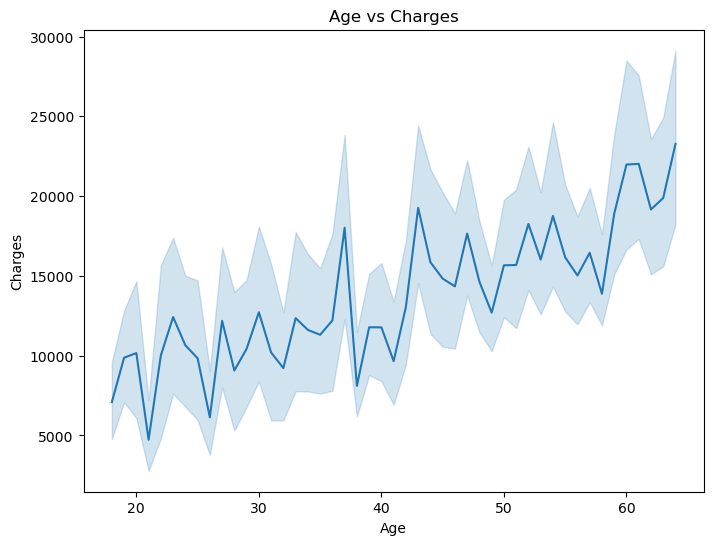

In [27]:
#we can see trend here clearly
plt.figure(figsize=(8, 6))
sns.lineplot(x='age', y='expenses', data=data)
plt.title("Age vs Charges")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()


Text(0.5, 1.0, 'sex vs charges')

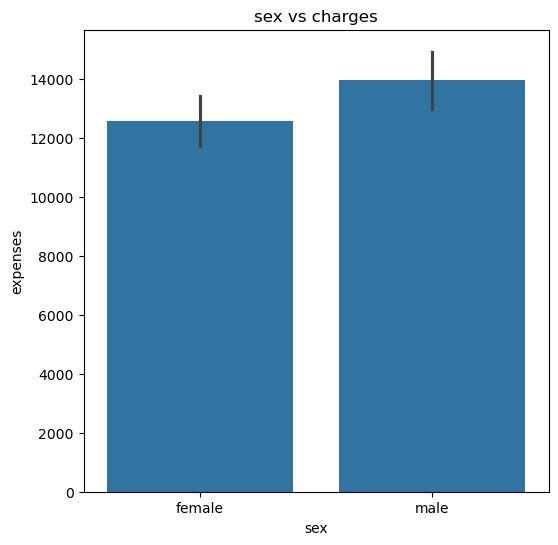

In [28]:
# sex vs charges
# males have slightly greater insurance charges than females in general

plt.figure(figsize = (6, 6))
sns.barplot(x = 'sex', y = 'expenses', data = data)
plt.title('sex vs charges')

Text(0.5, 1.0, 'children vs charges')

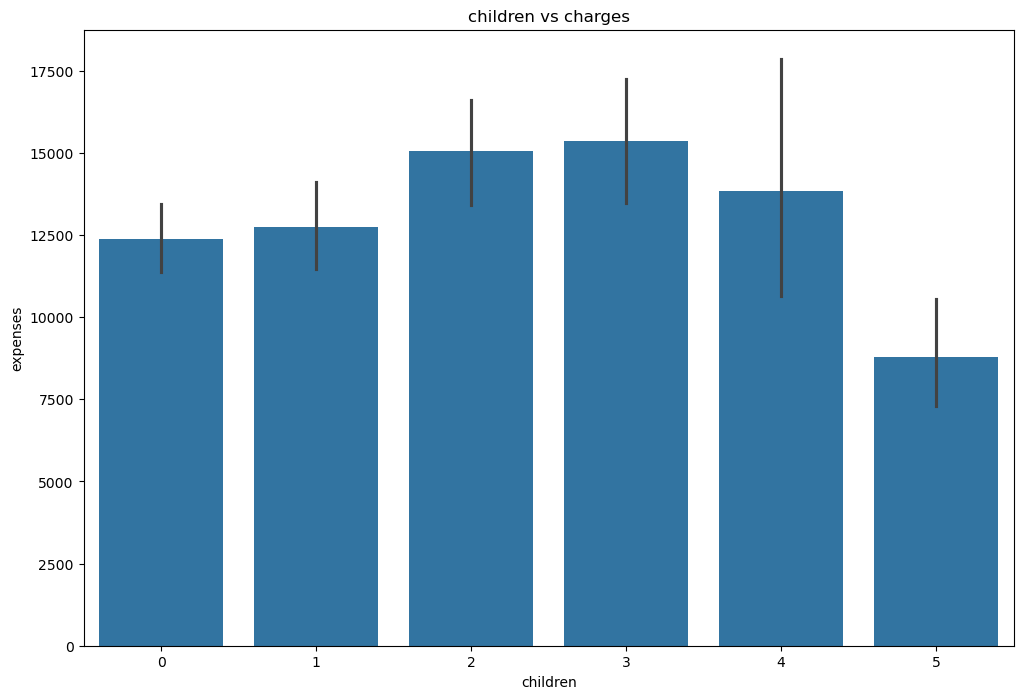

In [29]:
# children vs charges
# no. of childrens of a person has a very interesting dependency on insurance costs

plt.figure(figsize = (12, 8))
sns.barplot(x = 'children', y = 'expenses', data = data)
plt.title('children vs charges')

Text(0.5, 1.0, 'region vs charges')

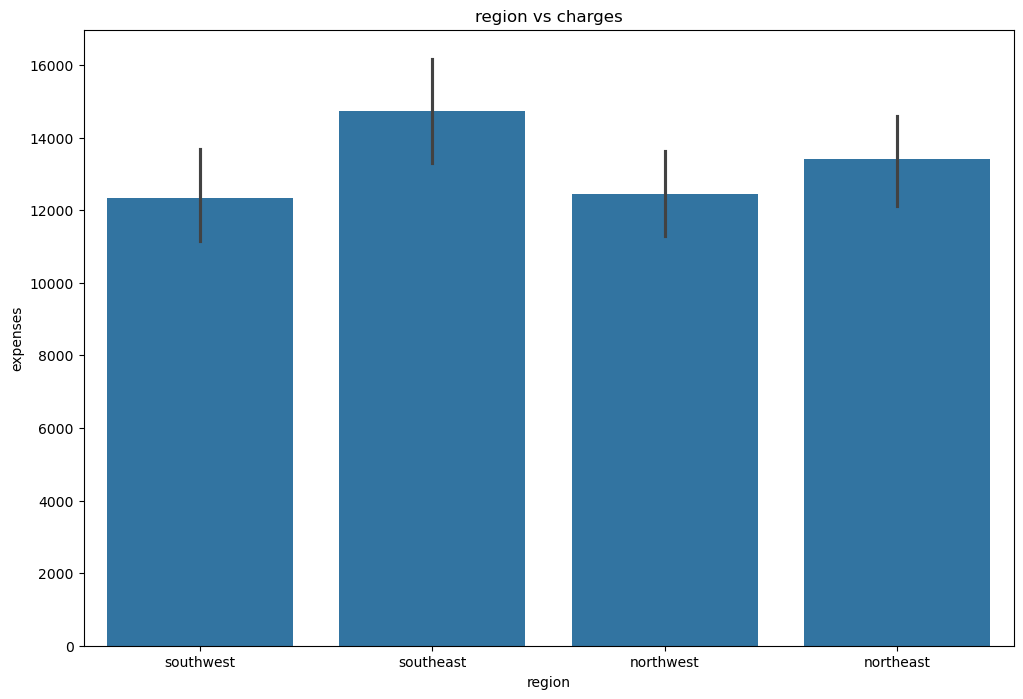

In [ ]:
# region vs charges


plt.figure(figsize = (12, 8))
sns.barplot(x = 'region', y = 'expenses', data = data)

plt.title('region vs charges')

Text(0.5, 1.0, 'smoker vs expenses')

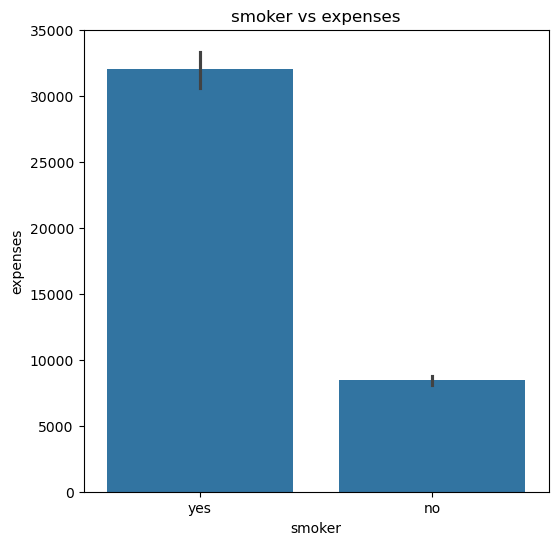

In [31]:
# smoker vs charges
# from the graph below, it is visible that smokers have more insurance charges than the non smokers

plt.figure(figsize = (6, 6))
sns.barplot(x = 'smoker', y = 'expenses', data = data)

plt.title('smoker vs expenses')

**Correlation Plot**

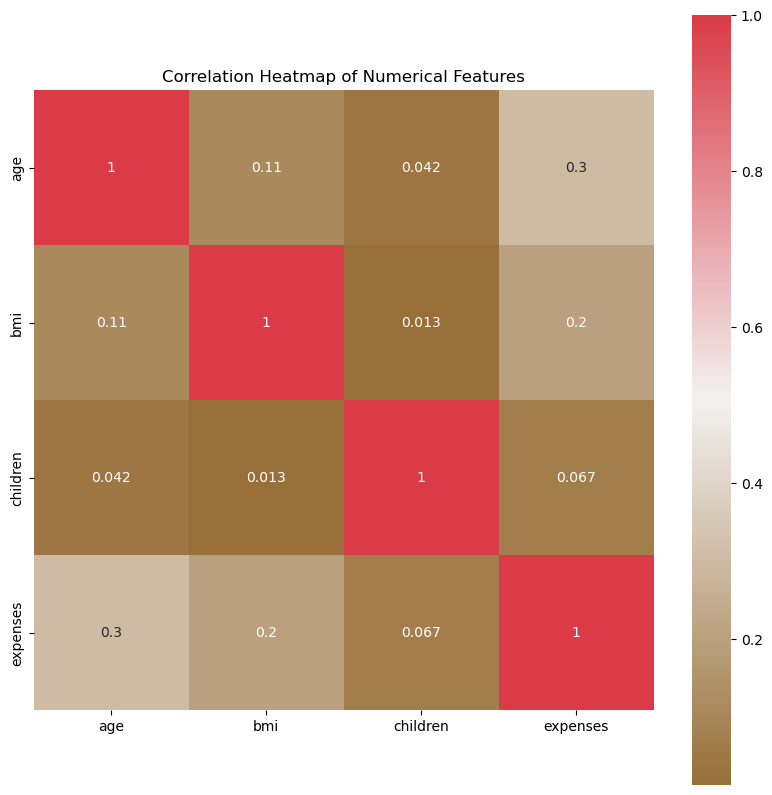

In [32]:
# plotting the correlation plot for the dataset

corr = data.select_dtypes(include='number').corr()

f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), 
            cmap=sns.diverging_palette(50, 10, as_cmap=True), square=True, ax=ax, annot=True)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


**Data Pre-processing**

In [33]:
# removing unnecassary columns from the dataset
data = data.drop('region', axis = 1)
print(data.shape)
data.columns

(1337, 6)


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'expenses'], dtype='object')

In [34]:
# label encoding for sex and smoker

# importing label encoder
from sklearn.preprocessing import LabelEncoder
# creating a label encoder
le = LabelEncoder()
# label encoding for sex
# 0 for females and 1 for males
data['sex'] = le.fit_transform(data['sex'])
# label encoding for smoker
# 0 for smokers and 1 for non smokers
data['smoker'] = le.fit_transform(data['smoker'])

In [35]:
# Split features and target
x = data.drop('expenses', axis=1)   # independent variables
y = data['expenses']                # dependent variable

print(x.shape)
print(y.shape)


(1337, 5)
(1337,)


In [36]:
# splitting the dataset into training and testing sets

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 30)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1069, 5)
(268, 5)
(1069,)
(268,)


In [37]:
# standard scaling

from sklearn.preprocessing import StandardScaler
# creating a standard scaler
sc = StandardScaler()
# feeding independents sets into the standard scaler
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

**Modelling**

**Linear Regression**

In [38]:
from sklearn.linear_model import LinearRegression
# Create and train the model
model = LinearRegression()
model.fit(x_train, y_train)

# Predict on test set
y_pred = model.predict(x_test)


In [40]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R² Score : {r2:.4f}")


MSE  : 162480200.54
RMSE : 12746.77
R² Score : -0.1340


# Improve the Performance

**Random Forest Regressor**

In [42]:
from sklearn.ensemble import RandomForestRegressor

# creating the model
model = RandomForestRegressor(n_estimators = 40, max_depth = 4, n_jobs = -1)

# feeding the training data to the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R² Score : {r2:.4f}")



MSE  : 18911074.72
RMSE : 4348.69
R² Score : 0.8680


In [45]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# creating the model
model = GradientBoostingRegressor()

# feeding the training data to the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R² Score : {r2:.4f}")


MSE  : 20419981.40
RMSE : 4518.85
R² Score : 0.8575


**Decision Forest**

In [43]:
from sklearn.tree import DecisionTreeRegressor

# creating the model
model = DecisionTreeRegressor()

# feeding the training data to the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R² Score : {r2:.4f}")



MSE  : 41260640.58
RMSE : 6423.44
R² Score : 0.7120


## Best Model
**RandomForestRegressor**

**Metrics**
* MSE  : 19160372.21
* RMSE : 4377.26
* R² Score : 0.8663

In [46]:
data.head()

,age,sex,bmi,children,smoker,expenses
0,19,0,27.9,0,1,16884.92
1,18,1,33.8,1,0,1725.55
2,28,1,33.0,3,0,4449.46
3,33,1,22.7,0,0,21984.47
4,32,1,28.9,0,0,3866.86


In [47]:
data.to_csv("cleanedInsurance.csv", index=False)